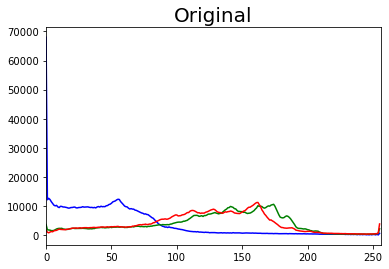

Original x Original: 1.0



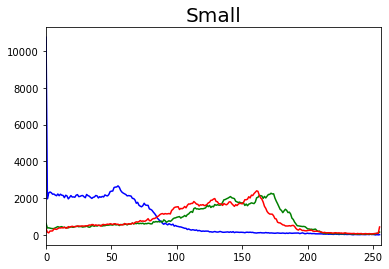

Original x Small: 0.9798882245302986



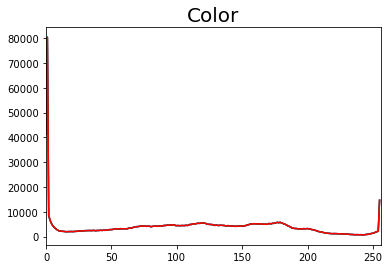

Original x Color: 0.1957200993049396



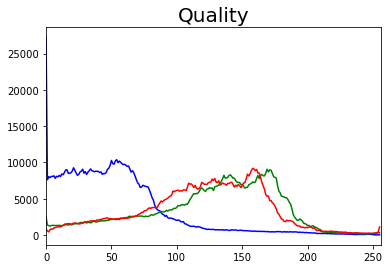

Original x Quality: 0.974466356460743



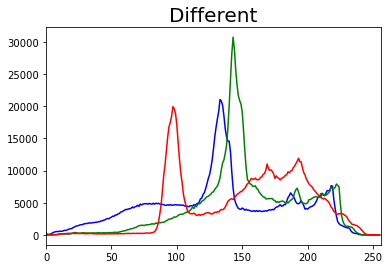

Original x Different: 0.2193355422716571



In [31]:
import numpy as np
import cv2 as cv
import os
from matplotlib import pyplot as plt
from statistics import mean

IMAGE_DIR_PATH = '/home/jupyter/python-opencv-sandbox/images/'

def show_glaph(title, img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    
    plt.title(title, fontsize = 20)
    plt.show()
    
# ヒストグラム比較
def compare(path1, path2):
    image_size = (200, 200)
    path1_img = cv.imread(path1)
    path1_img = cv.resize(path1_img, image_size)
    path2_img = cv.imread(path2)
    path2_img = cv.resize(path2_img, image_size)
    
    # 0:B, 1:G, 2:R
    channels = (0, 1, 2)
    hist_size = 256
    mask = None
    ranges = (0, 256)
    
    tmp = []
    for ch in channels:
        hist1 = cv.calcHist([path1_img], [ch], mask, [hist_size], ranges)
        hist2 = cv.calcHist([path2_img], [ch], mask, [hist_size], ranges)
        tmp.append(cv.compareHist(hist1, hist2, 0))
        
    # 平均を返却
    return mean(tmp)

original_path = os.path.join(IMAGE_DIR_PATH, 'cat-original.jpg')
small_path = os.path.join(IMAGE_DIR_PATH, 'cat-small.jpg')
color_path = os.path.join(IMAGE_DIR_PATH, 'cat-color.jpg')
quality_path = os.path.join(IMAGE_DIR_PATH, 'cat-quality.jpg')
different_path = os.path.join(IMAGE_DIR_PATH, 'cat-different.jpg')

img = cv.imread(original_path)
show_glaph('Original', img)
print('Original x Original: {0}\n'.format(compare(original_path, original_path)))

small_img = cv.imread(small_path)
show_glaph('Small', small_img)
print('Original x Small: {0}\n'.format(compare(original_path, small_path)))

color_img = cv.imread(color_path)
show_glaph('Color', color_img)
print('Original x Color: {0}\n'.format(compare(original_path, color_path)))

quality_img = cv.imread(quality_path)
show_glaph('Quality', quality_img)
print('Original x Quality: {0}\n'.format(compare(original_path, quality_path)))

different_img = cv.imread(different_path)
show_glaph('Different', different_img)
print('Original x Different: {0}\n'.format(compare(original_path, different_path)))